#import libraries

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/content/w2_position_salaries-220925-153437.csv')


In [3]:
data.head()


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


#prepare data

In [4]:
X = data[['Level']]
y = data['Salary']


#Train a Simple Linear Regression Model:
Fit a simple linear regression model to your data and compute the R^2 score.

In [5]:
simple_linear_model = LinearRegression()
simple_linear_model.fit(X, y)
simple_r2_score = simple_linear_model.score(X, y)


#Train Polynomial Regression Models:
Train polynomial regression models with degrees 2, 3, and 4, and compute their R^2 scores.

In [6]:
degrees = [2, 3, 4]
polynomial_r2_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    y_pred = poly_reg.predict(X_poly)
    r2 = r2_score(y, y_pred)
    polynomial_r2_scores.append(r2)


#Display the R^2 Scores:
Display the R^2 scores for the simple linear regression model and the polynomial regression models.

In [7]:
print(f"Simple Linear Regression R^2 Score: {simple_r2_score}")
for i, degree in enumerate(degrees):
    print(f"Polynomial Regression (Degree {degree}) R^2 Score: {polynomial_r2_scores[i]}")


Simple Linear Regression R^2 Score: 0.6690412331929895
Polynomial Regression (Degree 2) R^2 Score: 0.9162082221443942
Polynomial Regression (Degree 3) R^2 Score: 0.9812097727913366
Polynomial Regression (Degree 4) R^2 Score: 0.9973922891706614


#Optional: Visualize the Results:
If you'd like, you can visualize the regression models and the data points using matplotlib.

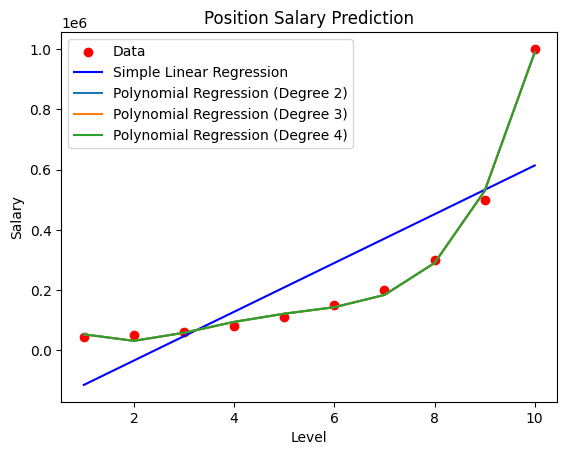

In [8]:
plt.scatter(X, y, color='red', label='Data')
plt.plot(X, simple_linear_model.predict(X), color='blue', label='Simple Linear Regression')
for i, degree in enumerate(degrees):
    plt.plot(X, poly_reg.predict(poly.fit_transform(X)), label=f'Polynomial Regression (Degree {degree})')
plt.title('Position Salary Prediction')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()
